# Adaptative Boosting

AdaBoost works by weighting the observations, putting more weight on difficult to classify instances and less on those already handled well. New weak learners are added sequentially that focus their training on the more difficult patterns.

## What is Boosting
Boosting is a general ensemble method that creates a strong classifier from a number of weak classifiers.

This is done by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.

Boosting algorithms combine multiple low accuracy(or weak) models to create a high accuracy(or strong) models.

## What is AdaBoost

AdaBoost was the first really successful boosting algorithm developed for binary classification. It is the best starting point for understanding boosting.

AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers

AdaBoost is one of the first boosting algorithms to be adapted in solving practices. Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”. Here are some (fun) facts about Adaboost!

1. The weak learners in AdaBoost are decision trees with a single split, called decision stumps.
2. AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well.
3. AdaBoost algorithms can be used for both classification and regression problem.

## AdaBoost Classifier

Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

1. The classifier should be trained interactively on various weighed training examples.
2. In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

## How does the AdaBoost algorithm work?
It works in the following steps:

1. Initially, Adaboost selects a training subset randomly.
2. It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
3. It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
4. Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
5. This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
6. To classify, perform a "vote" across all of the learning algorithms you built.

<img src='f.png'>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
X.shape

(150, 4)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.3,
                                                    shuffle=True)

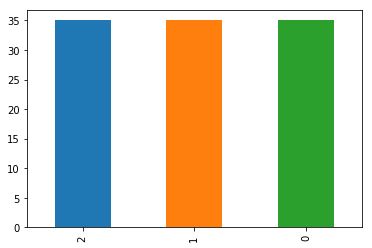

In [25]:
pd.value_counts(y_train).plot(kind='bar')

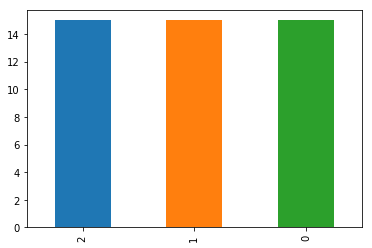

In [26]:
pd.value_counts(y_test).plot(kind='bar')

In [29]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

## "The most important parameters are base_estimator, n_estimators, and learning_rate."

**base_estimator:** It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.

**n_estimators:** Number of weak learners to train iteratively.

**learning_rate:** It contributes to the weights of weak learners. It uses 1 as a default value.

In [30]:
y_pred = abc.predict(X_test)

In [45]:
abc.score(X_test,y_test)

0.9111111111111111

In [46]:
abc.feature_importances_

array([0.22, 0.04, 0.4 , 0.34])

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


# Using different BaseEstimator

In [50]:
from sklearn.svm import SVC

svc = SVC(probability=True, kernel= 'linear' )

abc = AdaBoostClassifier(n_estimators=50,learning_rate=1,base_estimator=svc)

abc.fit(X_train,y_train)

y_pred = abc.predict(X_test)

In [53]:
abc.score(X_test,y_test)

0.9333333333333333

## Pros

AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

## Cons
AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.